In [0]:
from google.colab import drive # loads a library to mount your google drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/" # shows all files in your google drive root, including the project data file Tr0
path = "/content/drive/My Drive/" # sets the path to the root with the file Tr0

'Colab Notebooks'   Tr0   Tr0.zip   yaleExtB_data.npy   yaleExtB_target.npy


In [0]:
import os     # loads a library to work with data files
os.chdir(path) 
dnam = 'Tr0'
!unzip -q {dnam} # unzups the project file Tr0

replace Tr0/yaleB02_P00A+000E+00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
from os import listdir # loads a library to work with directories 
fls = listdir(path + dnam) # creates a list of all image files
n = len(fls) # the number of the image files  
print('Number of images %i' % n)

Number of images 1500


(77, 68)


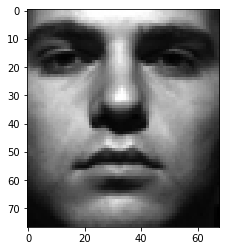

In [0]:
from matplotlib import image # loads a library to work with images
from matplotlib import pyplot # loads a library to plot images
im1 = image.imread(path + dnam + '/' + fls[0]) # chooses 1st image from the image list
print(im1.shape) # prints the size in pixels of the chosen image 
pyplot.imshow(im1, cmap=pyplot.cm.gray) # displays the image
pyplot.show()

In [0]:
import numpy as np  # loads a library for working with matrixes 
m=im1.shape[0]*im1.shape[1]  # m = h*w = (77*68=5236) is the number of pixels in images
images_data = np.zeros((n, m)) # creates a nxm-matrix of the images
images_target = np.zeros((n,))  # creates a n*1 matrix of targets which are the person labels 1 tp 30
# loops over all n=1500 images 
for i in range(0, n):
  filename = fls[i]  # loads a name of the image file
  img = image.imread(path + dnam + '/' + filename) # loads the image name
  images_data[i,:] = np.ravel(img) # vectorisation of the image 
  c = int(filename[5:7])  # extracts the class label from the file name
  images_target[i] = c  # assigns the target 
  #if i % 10 == 0:
  #  print('> loaded %s %s %s' % (i, filename, c)) # prints the image name

In [0]:
from numpy import asarray # loads a library for saving matrices
from numpy import save
# save as a .npy file
fn = (path + '/' + 'yaleExtB_data.npy') # creates the file name for the image data
save(fn, images_data) 
fn = (path + '/' + 'yaleExtB_target.npy') # creates the file name for the targets
save(fn, images_target)

In [0]:
# shows the files in the root, including 2 files *.npy 
!ls "/content/drive/My Drive/" 

'Colab Notebooks'   Tr0   Tr0.zip   yaleExtB_data.npy   yaleExtB_target.npy


In [0]:
from google.colab import drive # mounts the google drive for a new notebook 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')

In [0]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [0]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random states reprod
val_ratio=0.10  #70% training /30% validation


In [0]:
# PCA 
nof_prin_components = 180  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)


In [0]:
# train a neural network
nohn = 127 # nof hidden neurons
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver='lbfgs', activation='tanh', batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)



Fitting the classifier to the training set


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [0]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

In [0]:
print(pca.components_)

In [0]:
print(pca.explained_variance_)

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [0]:
y_pred = clf.predict(X_test_pca) # reoognises the test images 
print(classification_report(y_test, y_pred)) # the recognition accuracy








              precision    recall  f1-score   support

         2.0       1.00      0.94      0.97        16
         3.0       0.94      1.00      0.97        16
         4.0       1.00      0.92      0.96        13
         5.0       1.00      0.94      0.97        17
         6.0       0.95      1.00      0.97        18
         7.0       1.00      0.83      0.91        18
         8.0       0.83      0.91      0.87        11
         9.0       1.00      0.94      0.97        16
        11.0       0.93      1.00      0.96        13
        12.0       1.00      1.00      1.00        20
        13.0       1.00      0.85      0.92        13
        15.0       1.00      1.00      1.00        21
        16.0       0.93      0.93      0.93        14
        17.0       1.00      0.95      0.97        20
        18.0       0.93      1.00      0.96        13
        20.0       0.92      1.00      0.96        11
        22.0       1.00      0.75      0.86        12
        23.0       1.00    

In [0]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [(iris.data, iris.target),
             (X_digits, y_digits),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")